In [13]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
df_city = pd.read_csv(city_data_to_load)

df_ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset.
#used left join to preserve the key order
df_city_ride= pd.merge(df_ride, df_city, how='left', on=['city', 'city'] )

# Display the data table for preview
df_city_ride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

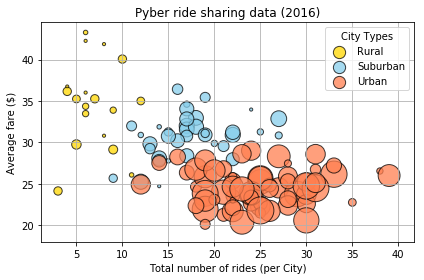

In [2]:

types = df_city_ride.set_index(['type', 'city'])

# Plot
x = types.groupby(['type', 'city'])['ride_id'].count()
y = types.groupby(['type', 'city'])['fare'].mean()
s = types.groupby(['type', 'city'])['driver_count'].mean()*10

#group by type
for i, color in zip(types.groupby(level=0), ['gold', 'skyblue', 'Coral']):
    plt.scatter(x=x.loc[i[0]], y=y.loc[i[0]],  s=s.loc[i[0]], label=i[0],  marker='o', alpha=0.75, color = color, edgecolor = "black")

#Add Lagend
lgnd = plt.legend(loc="best", numpoints=1, fontsize=10, title="City Types")
#set size
for legendHandle in lgnd.legendHandles:
    legendHandle._sizes = [150]

#add titles
plt.title('Pyber ride sharing data (2016)')
plt.ylabel('Average fare ($)')
plt.xlabel('Total number of rides (per City)')
plt.grid()
plt.tight_layout()


# Show plot
# Save Figure
plt.savefig("../Images/Pyberridesharingdata.png")
plt.show()

## Total Fares by City Type

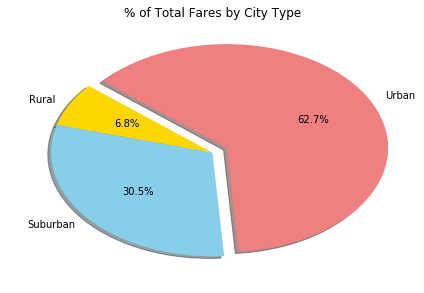

In [20]:
# Calculate Type Percents
df_total_fare = df_city_ride['fare'].sum()

group_types = df_city_ride.groupby(['type'])
df_type_fare = group_types['fare'].sum()

percent = df_type_fare/df_total_fare

# The colors of each section of the pie chart
colors = ['gold', 'skyblue', 'LightCoral']

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie(percent, explode=explode, labels=percent.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.tight_layout()
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig("../Images/TotalFaresbyCityType.png")
plt.show()


## Total Rides by City Type

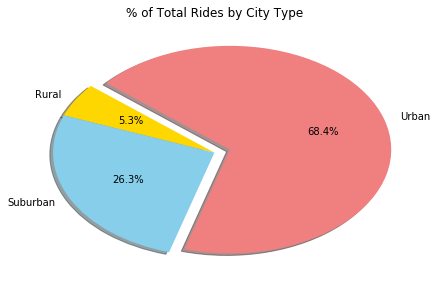

In [15]:
# Calculate Type Percents
df_total_rides = df_city_ride['ride_id'].count()

group_types = df_city_ride.groupby(['type'])
df_type_rides = group_types['ride_id'].count()

percent = df_type_rides/df_total_rides

# The colors of each section of the pie chart
colors = ['gold', 'skyblue', 'LightCoral']

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie(percent, explode=explode, labels=percent.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.tight_layout()
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig("../Images/TotalRidesbyCityType.png")
plt.show()

## Total Drivers by City Type

2973


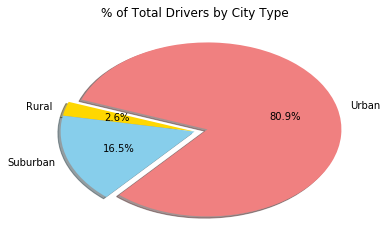

In [24]:
# Calculate Type Percents
df_total_driver = df_city['driver_count'].sum()
print (df_total_driver)

group_types = df_city.groupby(['type'])
df_type_driver = group_types['driver_count'].sum()

percent = df_type_driver/df_total_driver

# The colors of each section of the pie chart
colors = ['gold', 'skyblue', 'lightcoral']

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie(percent, explode=explode, labels=percent.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
#plt.tight_layout()
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig("../Images/TotalDriversbyCityType.png")
plt.show()


## Observation

#### 1. Total number of drivers lot are more in urban cities. Suburban cities are next to follow.

#### 2. Since drivers are more, total number of rides are also more in urban cities. Suburban cities are next to follow.

#### 3. According to bubble plot rural city types has greater fare for ride. Suburban is next high in fare